In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare Data

In [151]:
df = pd.read_csv(r'G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Credit.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [152]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [153]:
df.duplicated().sum()
df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64

### Converting Object dtypes to Categorical

In [154]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype("category")


### Encoding Categorical Variables

Label Encoding Test
```
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Own"].values)
list(le.classes_)
df["test"] = le.transform(df["Own"].values)

del df["test"]
```

In [155]:
from sklearn.preprocessing import LabelEncoder
for col in df:
    le = LabelEncoder()
    if pd.api.types.is_categorical_dtype(df[col]):
        le.fit(df[col].values)
        le.classes_
        df[col] = le.transform(df[col])


Ordinal Encoding 
```
from sklearn.preprocessing import OrdinalEncoder
for col in df:
    enc = OrdinalEncoder()
    if pd.api.types.is_categorical_dtype(df[col]):
        enc.fit(df[[col]])
        enc.categories_
        df[col] = enc.transform(df[[col]])
df
```

In [156]:
df

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,0,0,1,1,333
1,106.025,6645,483,3,82,15,1,1,1,2,903
2,104.593,7075,514,4,71,11,0,0,0,2,580
3,148.924,9504,681,3,36,11,1,0,0,2,964
4,55.882,4897,357,2,68,16,0,0,1,1,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,1,560
396,13.364,3838,296,5,65,17,0,0,0,0,480
397,57.872,4171,321,5,67,12,1,0,1,1,138
398,37.728,2525,192,1,44,13,0,0,1,1,0


### Normalizing
sets 0 for lowest value in data variable and 1 for highest

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
# scaler.data_max_
# scaler.data_min_
dh = scaler.fit_transform(df)
dh = pd.DataFrame(dh, columns= df.columns)
dh

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.0,0.0,1.0,0.5,0.166583
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,1.0,1.0,1.0,1.0,0.451726
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.0,0.0,0.0,1.0,0.290145
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,1.0,0.0,0.0,1.0,0.482241
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.0,0.0,1.0,0.5,0.165583
...,...,...,...,...,...,...,...,...,...,...,...
395,0.009882,0.248507,0.240720,0.250,0.120000,0.533333,0.0,0.0,1.0,0.5,0.280140
396,0.017075,0.228442,0.228346,0.500,0.560000,0.800000,0.0,0.0,0.0,0.0,0.240120
397,0.269560,0.253944,0.256468,0.500,0.586667,0.466667,1.0,0.0,1.0,0.5,0.069035
398,0.155287,0.127891,0.111361,0.000,0.280000,0.533333,0.0,0.0,1.0,0.5,0.000000


Alternatively
```
for col in df:
    df[col] = df[col].apply(lambda x: (x - min(df[col].values))/(max(df[col].values) - min(df[col].values)))
df
```

### Standardization
Transforms features by subtracting the mean and dividing by the standard deviation

Sets new mean to 0 with a standard deviation of 1

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dh)
ds = scaler.transform(dh)
ds = pd.DataFrame(ds, columns=dh.columns)
ds

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-1.035635,-0.333333,0.795395,-0.010581,-0.407277
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.965592,3.000000,0.795395,1.400189,0.834056
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,-1.035635,-0.333333,-1.257237,1.400189,0.130634
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.965592,-0.333333,-1.257237,1.400189,0.966900
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-1.035635,-0.333333,0.795395,-0.010581,-0.411633
...,...,...,...,...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171,-1.035635,-0.333333,0.795395,-0.010581,0.087078
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347,-1.035635,-0.333333,-1.257237,-1.421351,-0.087144
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550,0.965592,-0.333333,0.795395,-0.010581,-0.831944
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171,-1.035635,-0.333333,0.795395,-0.010581,-1.132477


In [159]:
print(scaler.mean_)
print(scaler.var_)

[0.19778129 0.2971818  0.29464567 0.2446875  0.43556667 0.56333333
 0.5175     0.1        0.6125     0.50375    0.26013757]
[0.03987346 0.03116779 0.03021521 0.02930771 0.05276657 0.0433
 0.24969375 0.09       0.23734375 0.12561094 0.0527652 ]


Alternatively
```
ds = pd.DataFrame(columns=df.columns)
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        ds[col] = df[col].apply(lambda x: (x - np.mean(df[col]))/np.std(df[col]))
ds
```

In [160]:
corr = ds.corr()
corr.style.background_gradient(cmap='coolwarm')

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,-0.010738,0.019632,0.035652,-0.034971,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.009397,-0.006015,0.031155,-0.042052,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.008885,-0.002028,0.036751,-0.045027,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,-0.022658,-0.026164,-0.009695,0.002904,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.004015,-0.029844,-0.073136,-0.073904,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.005049,0.072085,0.048911,0.009774,-0.008062
Own,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,1.000000,0.055034,0.012452,0.024333,0.021474
Student,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.055034,1.000000,-0.076974,0.031742,0.259018
Married,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,0.012452,-0.076974,1.000000,0.117008,-0.005673
Region,-0.034971,-0.042052,-0.045027,0.002904,-0.073904,0.009774,0.024333,0.031742,0.117008,1.000000,-0.014387


### P test Variable significance

Comparing P Values
```
from scipy import stats
dg = pd.DataFrame(columns=["r-sq","P"])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = stats.pearsonr(df[col], df.Balance.values)
        dg.loc[col] = [round(r,4), round(p,4)]

dg
```

In [161]:
# del ds["Limit"]

In [162]:
from scipy import stats
dg = pd.DataFrame(columns=["r-sq","P"])
for col in ds:
    if pd.api.types.is_numeric_dtype(ds[col]):
        r, p = stats.pearsonr(ds[col], ds.Balance.values)
        dg.loc[col] = [round(r,4), round(p,4)]

dg

,r-sq,P
Income,0.4637,0.0000
Limit,0.8617,0.0000
Rating,0.8636,0.0000
Cards,0.0865,0.0842
Age,0.0018,0.9708
Education,-0.0081,0.8723
Own,0.0215,0.6685
Student,0.2590,0.0000
Married,-0.0057,0.9099
Region,-0.0144,0.7742


### Removing Statistically Insignificant Features

In [163]:
for i in dg.index:
    if dg.loc[i,"P"] > 0.05:
        del ds[i]

In [164]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Income   400 non-null    float64
 1   Limit    400 non-null    float64
 2   Rating   400 non-null    float64
 3   Student  400 non-null    float64
 4   Balance  400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


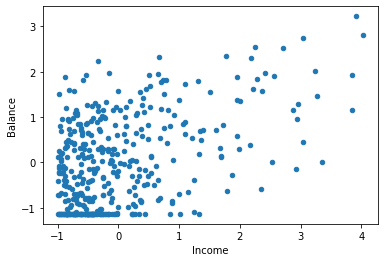

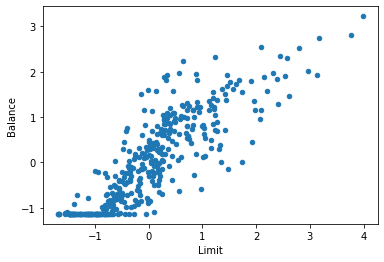

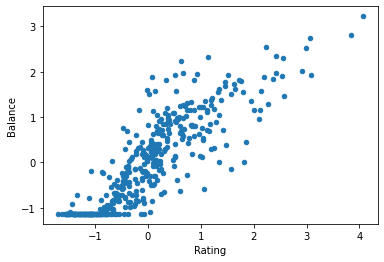

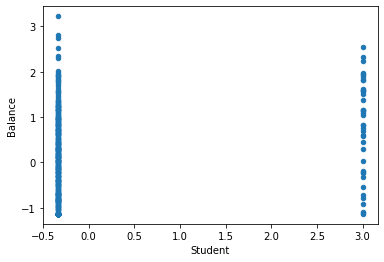

In [165]:
# plt.scatter(ds.Limit, ds.Balance)
# plt.scatter(df.Limit, df.Balance)
for i in range(len(ds.columns[:-1])):
    # plt.subplot(11,1,i+1)
    ds.plot(x=ds.columns[i], y="Balance", kind="scatter")
    plt.show()

## Multiple Linear Regression

In [166]:
X = ds[["Income", "Limit", "Rating", "Student"]].values
y = ds["Balance"]

In [167]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(X,y)
print(f"coefficient: {regr.coef_}")
print(f"intercept: {regr.intercept_}")
print(f"r-square: {regr.score(X,y)}")

coefficient: [-0.60902108  0.61090148  0.73715543  0.27614325]
intercept: 1.0222823054521329e-16
r-square: 0.9521875044403831


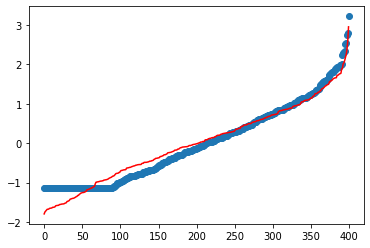

In [168]:
X_ = ds[["Income", "Limit", "Rating", "Student"]].values
ypred = regr.predict(X_)
plt.plot(sorted(y),'o',sorted(ypred),'-r')
plt.show()

## Polynomial Regression

In [175]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=True)
Xnew = poly.fit_transform(X)

# Applying Regression
regr = LinearRegression(fit_intercept=False).fit(Xnew,y)
print(f"coefficient: {regr.coef_}")
print(f"intercept: {regr.intercept_}")
print(f"r-square: {regr.score(Xnew,y)}")

coefficient: [-0.23640447 -0.65473627  0.93323489  0.43777636  0.1133891   0.15137844
 -0.35154862 -0.1317859  -0.05455128  0.792527   -0.69084294  0.15918412
  0.29993025 -0.03358517  0.06596646]
intercept: 0.0
r-square: 0.9834898353341359


Test
```
X1 = df[["Income", "Limit", "Rating", "Student"]].values
y1 = df.Balance.values
poly = PolynomialFeatures(2, include_bias=True)
X1new = poly.fit_transform(X1)

# Applying Regression
regr1 = LinearRegression(fit_intercept=False).fit(X1new,y1)
print(f"coefficient: {regr1.coef_}")
print(f"intercept: {regr1.intercept_}")
print(f"r-square: {regr1.score(X1new,y1)}")
```